<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/Harvard%20Chest%20XRay/Inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
import seaborn as sns
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.models.inception import InceptionOutputs
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.simplefilter("ignore")
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#data_path = "/content/drive/My Drive/Simple_Chest_XRay/"
#data_path = "/content/drive/My Drive/NIH_Chest_XRay/"
data_path = "/content/drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 0.4
batch_size = 96
num_epochs = 20

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
def data_sampling(indices):
  return torch.utils.data.sampler.SubsetRandomSampler(indices)

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**


In [ ]:
data_transforms = transforms.Compose([
  transforms.Resize((299, 299)),
  transforms.ToTensor(),
  transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

# Get dataset from folder and apply data transforms
dataset = datasets.ImageFolder(root = "{}data".format(data_path), transform = data_transforms)
  
# Get a sample of the data randomly
num_samples = int(len(dataset) * sample_ratio)
indices = np.random.choice(range(len(dataset)), num_samples, replace = False)

# Split the data into training, test, and validation sets
train_size = int(0.7 * num_samples)
test_size = int(0.2 * num_samples)
val_size = num_samples - train_size - test_size

train_indices = indices[ : train_size]
test_indices = indices[train_size : train_size + test_size]
val_indices = indices[train_size + test_size : ]

samples = [data_sampling(i) for i in [train_indices, test_indices, val_indices]]

# Create data loaders for training, test, and validation sets
train_loader = DataLoader(dataset, batch_size = batch_size, sampler = samples[0])
test_loader = DataLoader(dataset, batch_size = batch_size, sampler = samples[1])
val_loader = DataLoader(dataset, batch_size = batch_size, sampler = samples[2])

 **DOWNLOAD RESNET18 MODEL AND TRAIN**


In [ ]:
# Define the Inceptionv3 model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.9.0', 'inception_v3', pretrained = False)
model.fc = nn.Linear(model.fc.in_features, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
 
losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "Inceptionv3", num_epochs)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
Epoch 1/20: 100%|██████████| 96/96 [1:02:58<00:00, 39.36s/batch, Accuracy=0.469, Loss=1.31, Precision=0.447, Recall=0.379, F1 Score=0.363]


VALIDATION: Accuracy: 0.5512 | Loss: 1.1241 | Recall: 0.4908 | Precision: 0.5512 | F-score: 0.4715



Epoch 2/20: 100%|██████████| 96/96 [03:02<00:00,  1.90s/batch, Accuracy=0.574, Loss=1.08, Precision=0.505, Recall=0.45, F1 Score=0.453]


VALIDATION: Accuracy: 0.6147 | Loss: 0.9546 | Recall: 0.5564 | Precision: 0.6282 | F-score: 0.5706



Epoch 3/20: 100%|██████████| 96/96 [03:04<00:00,  1.92s/batch, Accuracy=0.665, Loss=0.878, Precision=0.556, Recall=0.508, F1 Score=0.517]


VALIDATION: Accuracy: 0.6850 | Loss: 0.8108 | Recall: 0.6376 | Precision: 0.6867 | F-score: 0.6481



Epoch 4/20: 100%|██████████| 96/96 [03:03<00:00,  1.91s/batch, Accuracy=0.721, Loss=0.743, Precision=0.596, Recall=0.554, F1 Score=0.565]


VALIDATION: Accuracy: 0.6980 | Loss: 0.7955 | Recall: 0.6939 | Precision: 0.7008 | F-score: 0.6819



Epoch 5/20: 100%|██████████| 96/96 [03:07<00:00,  1.95s/batch, Accuracy=0.732, Loss=0.716, Precision=0.623, Recall=0.584, F1 Score=0.596]


VALIDATION: Accuracy: 0.6437 | Loss: 0.9368 | Recall: 0.6117 | Precision: 0.7179 | F-score: 0.6173



Epoch 6/20: 100%|██████████| 96/96 [03:09<00:00,  1.97s/batch, Accuracy=0.77, Loss=0.618, Precision=0.647, Recall=0.611, F1 Score=0.623]


VALIDATION: Accuracy: 0.7607 | Loss: 0.6767 | Recall: 0.7225 | Precision: 0.7997 | F-score: 0.7352



Epoch 7/20: 100%|██████████| 96/96 [03:11<00:00,  1.99s/batch, Accuracy=0.797, Loss=0.553, Precision=0.668, Recall=0.635, F1 Score=0.646]


VALIDATION: Accuracy: 0.7798 | Loss: 0.6050 | Recall: 0.7664 | Precision: 0.7776 | F-score: 0.7700



Epoch 8/20: 100%|██████████| 96/96 [03:13<00:00,  2.02s/batch, Accuracy=0.804, Loss=0.519, Precision=0.685, Recall=0.653, F1 Score=0.665]


VALIDATION: Accuracy: 0.7852 | Loss: 0.5825 | Recall: 0.7552 | Precision: 0.7889 | F-score: 0.7618



Epoch 9/20: 100%|██████████| 96/96 [03:17<00:00,  2.06s/batch, Accuracy=0.831, Loss=0.459, Precision=0.701, Recall=0.671, F1 Score=0.682]


VALIDATION: Accuracy: 0.7882 | Loss: 0.5788 | Recall: 0.7728 | Precision: 0.7918 | F-score: 0.7712



Epoch 10/20: 100%|██████████| 96/96 [03:19<00:00,  2.07s/batch, Accuracy=0.85, Loss=0.41, Precision=0.717, Recall=0.688, F1 Score=0.699]


VALIDATION: Accuracy: 0.8242 | Loss: 0.4970 | Recall: 0.8086 | Precision: 0.8269 | F-score: 0.8138



Epoch 11/20: 100%|██████████| 96/96 [03:25<00:00,  2.14s/batch, Accuracy=0.851, Loss=0.398, Precision=0.729, Recall=0.701, F1 Score=0.712]


VALIDATION: Accuracy: 0.7829 | Loss: 0.5709 | Recall: 0.7906 | Precision: 0.7794 | F-score: 0.7803



Epoch 12/20: 100%|██████████| 96/96 [03:27<00:00,  2.16s/batch, Accuracy=0.868, Loss=0.364, Precision=0.741, Recall=0.714, F1 Score=0.725]


VALIDATION: Accuracy: 0.8219 | Loss: 0.4995 | Recall: 0.8057 | Precision: 0.8152 | F-score: 0.8076



Epoch 13/20: 100%|██████████| 96/96 [03:30<00:00,  2.19s/batch, Accuracy=0.866, Loss=0.361, Precision=0.751, Recall=0.725, F1 Score=0.735]


VALIDATION: Accuracy: 0.8219 | Loss: 0.5144 | Recall: 0.7990 | Precision: 0.8418 | F-score: 0.8092



Epoch 14/20: 100%|██████████| 96/96 [03:34<00:00,  2.23s/batch, Accuracy=0.886, Loss=0.306, Precision=0.761, Recall=0.736, F1 Score=0.746]


VALIDATION: Accuracy: 0.8272 | Loss: 0.4697 | Recall: 0.8139 | Precision: 0.8278 | F-score: 0.8200



Epoch 15/20: 100%|██████████| 96/96 [03:36<00:00,  2.25s/batch, Accuracy=0.895, Loss=0.288, Precision=0.77, Recall=0.746, F1 Score=0.756]


VALIDATION: Accuracy: 0.8265 | Loss: 0.5204 | Recall: 0.8044 | Precision: 0.8355 | F-score: 0.8142



Epoch 16/20: 100%|██████████| 96/96 [03:38<00:00,  2.28s/batch, Accuracy=0.902, Loss=0.265, Precision=0.779, Recall=0.755, F1 Score=0.765]


VALIDATION: Accuracy: 0.8058 | Loss: 0.5946 | Recall: 0.8052 | Precision: 0.8261 | F-score: 0.7986



Epoch 17/20: 100%|██████████| 96/96 [03:39<00:00,  2.29s/batch, Accuracy=0.908, Loss=0.248, Precision=0.786, Recall=0.764, F1 Score=0.773]


VALIDATION: Accuracy: 0.8356 | Loss: 0.4955 | Recall: 0.8175 | Precision: 0.8394 | F-score: 0.8264



Epoch 18/20: 100%|██████████| 96/96 [03:41<00:00,  2.30s/batch, Accuracy=0.913, Loss=0.239, Precision=0.794, Recall=0.772, F1 Score=0.781]


VALIDATION: Accuracy: 0.8502 | Loss: 0.4458 | Recall: 0.8448 | Precision: 0.8455 | F-score: 0.8437



Epoch 19/20: 100%|██████████| 96/96 [03:40<00:00,  2.30s/batch, Accuracy=0.919, Loss=0.218, Precision=0.8, Recall=0.779, F1 Score=0.788]


VALIDATION: Accuracy: 0.8417 | Loss: 0.4641 | Recall: 0.8399 | Precision: 0.8376 | F-score: 0.8378



Epoch 20/20: 100%|██████████| 96/96 [03:48<00:00,  2.39s/batch, Accuracy=0.912, Loss=0.238, Precision=0.806, Recall=0.786, F1 Score=0.794]


VALIDATION: Accuracy: 0.8609 | Loss: 0.4220 | Recall: 0.8521 | Precision: 0.8595 | F-score: 0.8553

[1.3144906034574861, 1.0794738505058843, 0.877656307914533, 0.7433942471836554, 0.7161742455580759, 0.6177794357301524, 0.5533506983538792, 0.5190257818213501, 0.458832052109372, 0.4098333772277978, 0.39808204261712876, 0.3636354523309006, 0.3606961966692626, 0.30600719153718237, 0.287911570068266, 0.2652505661047765, 0.24763662072103956, 0.23947320562114535, 0.21783181250180042, 0.2377008703800775] [1.1240651766094594, 0.954567689414418, 0.8108248639544215, 0.7955237249715612, 0.9367545832187758, 0.6766882467707362, 0.6049522391153038, 0.5825113572111917, 0.5787989037846206, 0.49700893256642403, 0.5708686427785716, 0.49949422560700585, 0.5144003235965694, 0.46970617579757623, 0.5204367320471948, 0.5945935618439946, 0.49552830506902223, 0.4458289567483674, 0.46414280976724187, 0.4220133872207152]


**SAVE MODEL PARAMETERS**

In [ ]:
torch.save(model.state_dict(), "{}inceptionv3.pth".format(data_path))

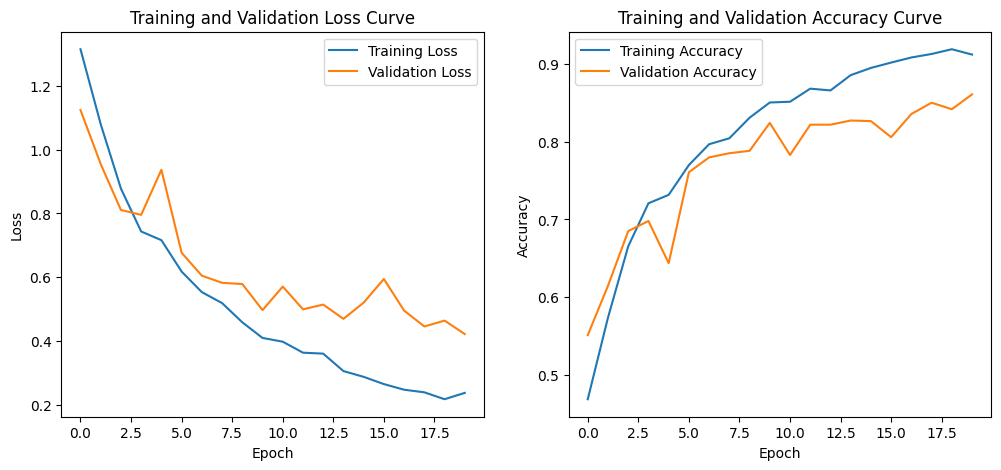

In [ ]:
#Plot the Accuracy and Loss Curves of the model for Training and Validation
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

**EVALUATE MODEL ON VALIDATION AND TEST SET**

TEST: Accuracy: 0.8619 | Loss: 0.4322 | Recall: 0.8504 | Precision: 0.8603 | F-score: 0.8549



<Figure size 800x800 with 0 Axes>

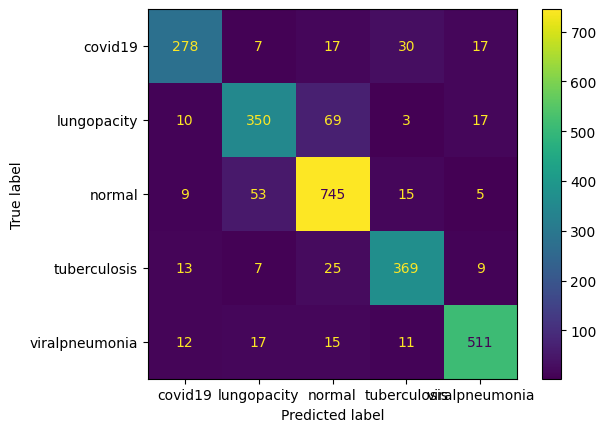

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "Inceptionv3")

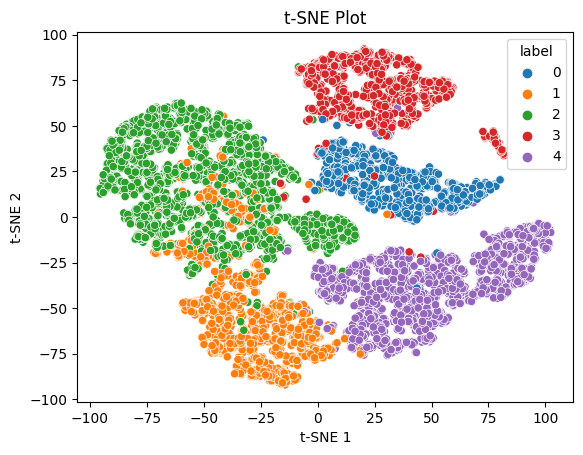

In [ ]:
#Obtain the TSNE Plot
plot_TSNE(train_loader, device, model)

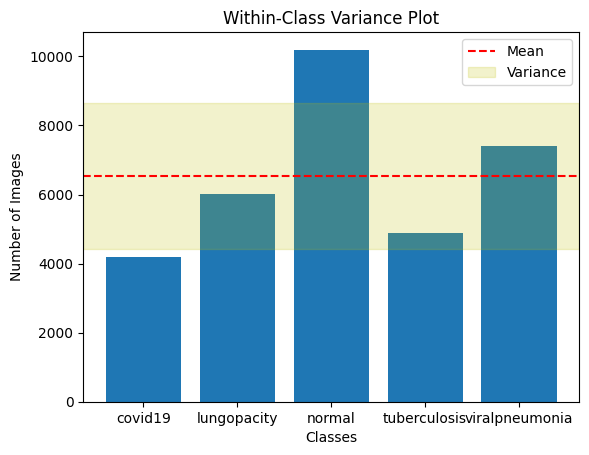

In [ ]:
#Plot the Within-Class Variance of the dataset
plot_within_class_variance(dataset)